<a href="https://colab.research.google.com/github/yonaan/pypy/blob/main/Tugas%20Pertemuan%2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np 
import matplotlib.pyplot as mpl

In [128]:
ntl = lambda n: 10*np.log10(n)

In [129]:
ltn = lambda x: 10**(x/10)

In [130]:
def pathloss(frq,types,ht,hr,d):
  if frq in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif frq in range(1501,2001):
    Ca=46.3
    Cb=33.9
  else:
    Ca = print("error")
    Cb = print("error")
    return Ca,Cb
  
  if types == 'urban' :
    cm=0
  elif types == 'suburban' :
    cm=-2*((np.log10((frq/28)**2))-5.4)
  elif types == 'open':
    cm=-4.78*(np.log10(frq))+18.33*(np.log10(frq))-40.94
  else:
    cm=print('wrong type')
  
  ahr = (1.1*np.log10(frq)-0.7)*hr-(1.56*np.log10(frq)-1.8)

  Lp = Ca+(Cb*np.log10(frq))-(13.83*np.log10(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-cm
  return Lp

In [131]:
frq1=700 
frq2=900 
frq3=1800 
loc1='urban'
loc2='suburban'
loc3='open'
th=80 
user=1.5 
dmin=300 
dmax=1000 
N=200 
d=np.random.randint(dmin,dmax,N)

print(d) 

[986 406 473 662 566 651 684 331 585 711 480 877 528 667 544 429 502 384
 691 767 352 353 831 907 902 547 382 583 322 488 319 421 392 535 603 435
 436 868 592 629 994 936 588 967 628 525 634 318 415 758 381 855 884 903
 995 566 690 549 318 868 827 430 781 824 492 695 930 370 585 497 422 580
 943 985 632 792 468 784 449 901 806 860 343 425 756 743 977 528 824 592
 859 547 812 901 660 790 697 442 547 508 471 592 467 829 974 573 515 301
 727 762 727 572 763 370 617 742 929 761 804 985 647 923 358 529 645 827
 798 544 843 734 680 929 726 519 392 718 922 980 346 991 498 689 849 492
 512 840 368 747 778 603 873 899 377 807 941 562 700 941 998 516 992 499
 756 623 893 967 322 602 366 929 953 521 826 366 758 410 963 521 781 809
 746 659 573 350 858 575 679 608 347 537 649 453 478 723 499 478 627 916
 485 480]


In [132]:
def pval(Ptx,Pl,Gtx,Grx):
  
  PtdB=ntl(Ptx) 
  pow=PtdB - Pl + Gtx + Grx
  pwr=ltn(pow)

  return pwr

In [133]:
tx = 30000 
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = Urbanfrq_sort
Ple = Urbanfrq2_sort
Plf = Urbanfrq3_sort
gtx = 10 
grx = 2 

In [134]:
#Location variation
powUrban = pval(tx, Pla, gtx, grx)
powSubUrban = pval(tx, Plb, gtx, grx)
powOpen = pval(tx, Plc, gtx, grx)

#Frequency variation
powUrban700  = pval(tx, Pld, gtx, grx)
powUrban900  = pval(tx, Ple, gtx, grx)
powUrban1800 = pval(tx, Plf, gtx, grx)

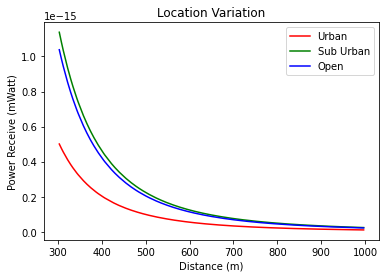

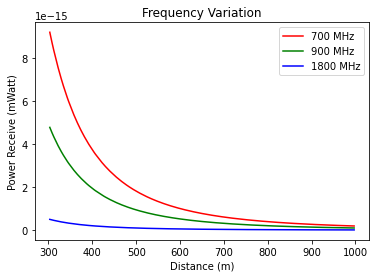

In [135]:
fig, ax = mpl.subplots()
ax.plot(d_sort,powUrban, color='r', label='Urban')
ax.plot(d_sort,powSubUrban, color='g', label='Sub Urban')
ax.plot(d_sort,powOpen, color='b', label='Open')
ax.set_title('Location Variation')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
mpl.show()

fig, ax = mpl.subplots()
ax.plot(d_sort,powUrban700, color='r', label='700 MHz')
ax.plot(d_sort,powUrban900, color='g', label='900 MHz')
ax.plot(d_sort,powUrban1800, color='b', label='1800 MHz')
ax.set_title('Frequency Variation')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
mpl.show()

In [136]:
def SNRValue(pow,BW):

  No=-174+10*np.log10(BW)
  NoW=ltn(No)
  SNR= pow/NoW

  return SNR

In [137]:
pow1 = powUrban
pow2 = powSubUrban
pow3 = powOpen
pow4 = powUrban700
pow5 = powUrban900
pow6 = powUrban1800
BW   = 50000000

In [138]:
#Location variation
SNRUrban = SNRValue(pow1,BW)
SNRSubUrban = SNRValue(pow2,BW)
SNROpen = SNRValue(pow3,BW)

#Frequency variation
SNRUrban700 = SNRValue(pow4,BW)
SNRUrban900 = SNRValue(pow5,BW)
SNRUrban1800 = SNRValue(pow6,BW)

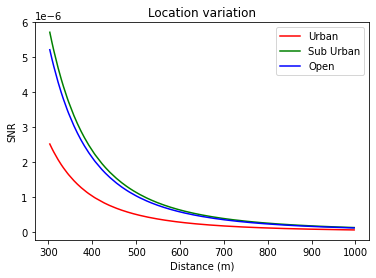

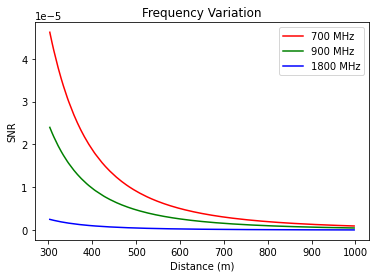

In [139]:
fig, ax = mpl.subplots()
ax.plot(d_sort,SNRUrban, color='r', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='g', label='Sub Urban')
ax.plot(d_sort,SNROpen, color='b', label='Open')
ax.set_title('Location variation')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
mpl.show()

fig, ax = mpl.subplots()
ax.plot(d_sort,SNRUrban700, color='r', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='g', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='b', label='1800 MHz')
ax.set_title('Frequency Variation')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
mpl.show()

In [140]:
def Capacity(SNR,BW):

  Celcap = BW*np.log2(1+SNR)

  return Celcap

In [141]:
SNR1 = SNRUrban 
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [142]:
#Location variation
celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)

#Frequency variation
celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

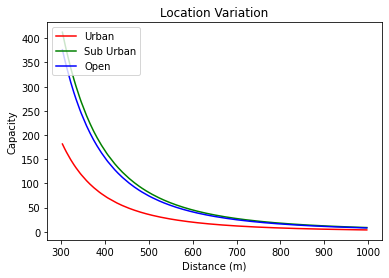

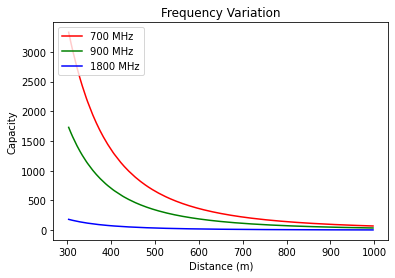

In [143]:
fig, ax = mpl.subplots()
ax.plot(d_sort,celcapUrban, color='r', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='g', label='Sub Urban')
ax.plot(d_sort,celcapOpen, color='b', label='Open')
ax.set_title('Location Variation')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
mpl.show()

fig, ax = mpl.subplots()
ax.plot(d_sort,celcapUrban700, color='r', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='g', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='b', label='1800 MHz')
ax.set_title('Frequency Variation')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
mpl.show()